In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/drive/MyDrive/Concept of technology and AI/diabetes.csv'
data = pd.read_csv(file_path)

In [ ]:
# Display first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# EDA
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [ ]:
# Check for missing values
print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Fill missing values
data.fillna(data.mean(), inplace=True)

In [ ]:
# Regression Task: Predict BloodPressure
X_reg = data.drop(['BloodPressure', 'Outcome'], axis=1)
y_reg = data['BloodPressure']

In [ ]:
# Split the dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
# Fit a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

LinearRegression()

In [ ]:
# Predictions and evaluation
y_pred_reg = lin_reg.predict(X_test_reg)
print("Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"R2 Score: {r2_score(y_test_reg, y_pred_reg):.2f}")

Regression Results:
Mean Squared Error: 408.80
R2 Score: 0.18


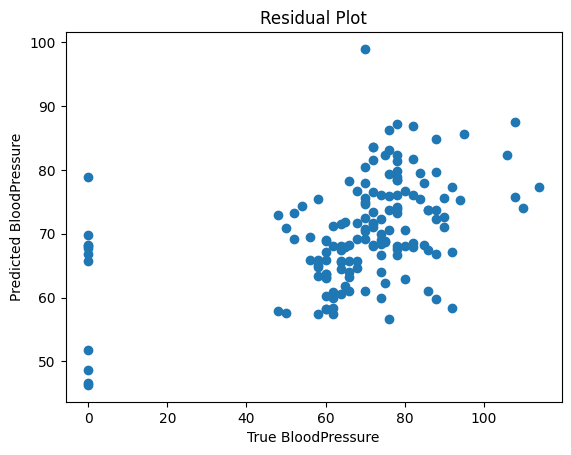

In [ ]:
# Residual Plot
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("True BloodPressure")
plt.ylabel("Predicted BloodPressure")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Classification Task: Predict Outcome
X_clf = data.drop(['Outcome'], axis=1)
y_clf = data['Outcome']

In [ ]:
# Standardizing features
scaler = StandardScaler()
X_clf_scaled = scaler.fit_transform(X_clf)

In [ ]:
# Split the dataset
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf_scaled, y_clf, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_clf, y_train_clf)

LogisticRegression()

In [ ]:
# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_clf, y_train_clf)

KNeighborsClassifier()

In [ ]:
# Predictions and evaluations
for model, name in zip([log_reg, knn], ["Logistic Regression", "KNN"]):
    y_pred_clf = model.predict(X_test_clf)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.2f}")
    print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))
    print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))


Logistic Regression Results:
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
 [[79 20]
 [18 37]]

KNN Results:
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154

Confusion Matrix:
 [[79 20]
 [28 27]]


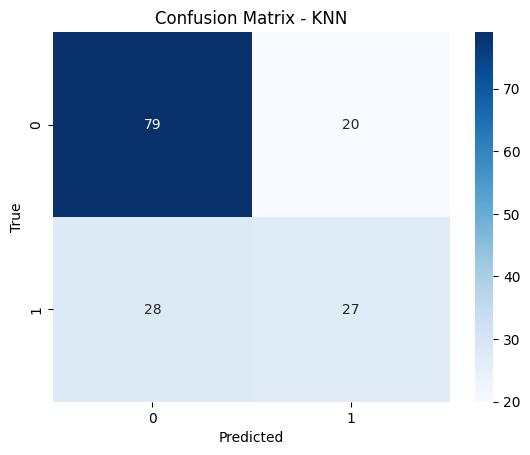

In [ ]:
  # Confusion Matrix Heatmap
  sns.heatmap(confusion_matrix(y_test_clf, y_pred_clf), annot=True, fmt='d', cmap='Blues')
  plt.title(f"Confusion Matrix - {name}")
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.show()